# MACHINE LEARNING - SUPERVISED LEARNING MODELS


# PART 1 

In [1]:
# IMPORT LIBRARY

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd

In [2]:
# import dataset
dataseti = pd.read_csv('bank.csv',sep=';')
dataseti

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# 2 EXPLORATORY DATA ANALYSIS

In [3]:
dataseti.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
dataseti.shape

(41188, 21)

In [5]:
dataseti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 2.a) misssing value analysis

 some records contain the value unknown- which refers to NaN values

In [6]:
dataseti.replace({"unknown": np.NaN}, inplace=True)
dataseti

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
dataseti.isnull().sum()              # remove the null values

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [8]:
dataset = dataseti.drop(['default','education'],axis=1)
dataset = dataset.dropna()
dataset.isnull().sum()


age               0
job               0
marital           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# 2.b) Label Encode the object datatypes

In [9]:
from sklearn.preprocessing import LabelEncoder
lbl = np.array(dataset.select_dtypes(include ='object').columns)
for x in lbl:
    dataset[x]= LabelEncoder().fit_transform(dataset[x])
dataset    

,age,job,marital,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,1,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,1,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [10]:
#correlation
dataset.corr()

,age,job,marital,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.006923,-0.395182,-0.001726,-0.006579,0.005548,-0.025080,-0.019070,0.000991,0.003354,-0.035057,0.025148,0.020376,-0.001332,-0.000187,0.128351,0.009797,-0.018364,0.030315
job,-0.006923,1.000000,0.025234,0.007396,-0.011684,-0.029791,-0.034888,-0.004226,-0.006228,-0.007421,-0.027287,0.020945,0.009475,-0.011741,-0.020708,0.047300,-0.011566,-0.021549,0.025432
marital,-0.395182,0.025234,1.000000,0.011410,0.005790,-0.056788,-0.010599,0.002413,0.006078,-0.007577,-0.035947,0.037390,0.000809,-0.083416,-0.057829,-0.035305,-0.091729,-0.085692,0.044870
housing,-0.001726,0.007396,0.011410,1.000000,0.046244,-0.081926,-0.017429,0.003459,-0.007534,-0.010343,-0.011322,0.021682,-0.011278,-0.060679,-0.080782,-0.034321,-0.059710,-0.046471,0.011675
loan,-0.006579,-0.011684,0.005790,0.046244,1.000000,-0.012000,-0.007199,-0.009582,0.000242,0.005063,-0.000323,-0.002089,0.000238,0.002138,-0.004173,-0.013073,0.000295,0.004518,-0.004169
contact,0.005548,-0.029791,-0.056788,-0.081926,-0.012000,1.000000,0.275072,-0.009444,-0.024631,0.078100,0.116640,-0.210581,0.118065,0.391269,0.590236,0.251747,0.396940,0.266246,-0.143120
month,-0.025080,-0.034888,-0.010599,-0.017429,-0.007199,0.275072,1.000000,0.027230,0.004387,-0.061791,-0.045222,0.100532,-0.065534,-0.179867,-0.006199,0.007057,-0.117721,-0.220847,-0.005234
day_of_week,-0.019070,-0.004226,0.002413,0.003459,-0.009582,-0.009444,0.027230,1.000000,0.021436,-0.038057,-0.009736,-0.003210,0.018368,0.033543,0.006112,0.038969,0.038779,0.028628,0.015751
duration,0.000991,-0.006228,0.006078,-0.007534,0.000242,-0.024631,0.004387,0.021436,1.000000,-0.071354,-0.047323,0.018767,0.034573,-0.026712,0.006469,-0.008180,-0.031130,-0.043017,0.405054
campaign,0.003354,-0.007421,-0.007577,-0.010343,0.005063,0.078100,-0.061791,-0.038057,-0.071354,1.000000,0.052189,-0.079328,0.032988,0.150926,0.128136,-0.013920,0.135333,0.144273,-0.065781


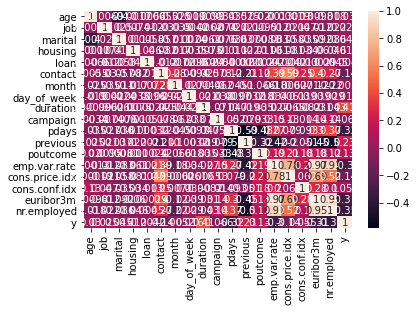

In [11]:
#correlogram
sb.heatmap(dataset.corr(),annot=True)


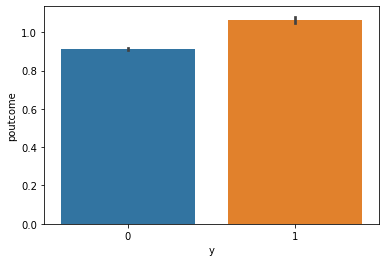

In [12]:
# basic graph
sb.barplot(x='y',y='poutcome',data=dataset)

In [13]:
dataset.columns

Index(['age', 'job', 'marital', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [14]:
# remove unnecessary columns
data = dataset.drop([ 'duration','day_of_week'],axis=1)
data['pdays'] = data['pdays'].apply(lambda x: 0 if x ==999 else 1)
data

,age,job,marital,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,1,6,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,0,0,1,6,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,0,1,6,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,1,6,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,0,1,1,6,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,1,0,0,7,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,0,0,0,7,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,1,0,0,7,2,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,0,0,0,7,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


- SPLIT DEPENDENT INDEPENDENT

In [15]:
x_indep = data.drop('y',axis=1)
x_indep

,age,job,marital,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,1,6,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,0,0,1,6,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,1,0,1,6,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,0,0,1,6,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,0,1,1,6,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,1,0,0,7,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,0,0,0,7,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,1,0,0,7,2,0,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,0,0,0,7,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [16]:
y_dep = dataset.y
y_dep

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 39803, dtype: int32

 - SPLIT TRAIN TEST

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_indep,y_dep,test_size=0.2,random_state=2)
x_train

,age,job,marital,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
40415,32,2,2,1,0,1,1,1,0,0,1,-1.7,94.027,-38.3,0.905,4991.6
4958,49,4,1,1,0,1,6,2,0,0,1,1.1,93.994,-36.4,4.858,5191.0
31538,27,0,2,1,0,0,6,1,0,0,1,-1.8,92.893,-46.2,1.327,5099.1
23265,47,9,0,1,0,0,1,5,0,0,1,1.4,93.444,-36.1,4.964,5228.1
25763,52,6,1,0,0,0,7,1,0,0,1,-0.1,93.200,-42.0,4.120,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32090,35,0,1,1,1,0,6,1,0,0,1,-1.8,92.893,-46.2,1.313,5099.1
31334,45,1,1,0,0,0,6,1,0,0,1,-1.8,92.893,-46.2,1.334,5099.1
6929,46,0,1,1,0,1,6,1,0,0,1,1.1,93.994,-36.4,4.860,5191.0
36557,29,7,2,0,0,0,4,2,1,1,2,-2.9,92.963,-40.8,1.260,5076.2


# 2.d) handing imbalance data - SMOTE

#since y is the dependent variable - we balance the data

In [18]:
from collections import Counter
Counter(y_train)
y_train.value_counts()

0    28247
1     3595
Name: y, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE
bal = SMOTE()
x_trainsm,y_trainsm = bal.fit_resample(x_train,y_train)

In [20]:
Counter(y_trainsm)
y_trainsm.value_counts()

1    28247
0    28247
Name: y, dtype: int64

# 2.E) STANDARDIZE DATA

In [21]:
from sklearn.preprocessing import Normalizer 
norm = Normalizer()
x_trainscale = norm.fit_transform(x_train)
x_testscale = norm.fit_transform(x_test)
x_trainscale

array([[ 6.40931062e-03,  4.00581913e-04,  4.00581913e-04, ...,
        -7.67114364e-03,  1.81263316e-04,  9.99772340e-01],
       [ 9.43720025e-03,  7.70383694e-04,  1.92595923e-04, ...,
        -7.01049162e-03,  9.35630996e-04,  9.99765439e-01],
       [ 5.29387735e-03,  0.00000000e+00,  3.92139063e-04, ...,
        -9.05841235e-03,  2.60184268e-04,  9.99778147e-01],
       ...,
       [ 8.85946243e-03,  0.00000000e+00,  1.92597009e-04, ...,
        -7.01053114e-03,  9.36021465e-04,  9.99771075e-01],
       [ 5.71168964e-03,  1.37868371e-03,  3.93909630e-04, ...,
        -8.03575646e-03,  2.48163067e-04,  9.99782033e-01],
       [ 7.69679764e-03,  1.92419941e-04,  1.92419941e-04, ...,
        -8.08163753e-03,  8.06431973e-04,  9.99775530e-01]])

# 3 - Supervised Models

#    3.A) LOGISTIC REGRESSION

 model build

In [22]:
import statsmodels.api as sm

In [23]:
logmodel = sm.Logit(y_train,x_train)
logfit = logmodel.fit()
logfit.summary2()

Optimization terminated successfully.
         Current function value: 0.282012
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.200     
Dependent Variable: y                AIC:              17991.6263
Date:               2021-01-21 12:04 BIC:              18125.5230
No. Observations:   31842            Log-Likelihood:   -8979.8   
Df Model:           15               LL-Null:          -11226.   
Df Residuals:       31826            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age               0.0018   0.0019   0.9766 0.3287 -0.0018  0.0055
job               0.0022   0.0056   0.3864 0.6992 -0.0088  0.0131
marital           0.0611   0.0364   1.6788 0.0932 -0.0102  0.1324
housing          -0.0381   0.0400  -0.9513 0.3415 -0.1165  0.0404
loan             -0.0053   0.0552  -0.0969 0.9228 -0.1135  0.1028
contact          -0.7149   0.0578 -12.3674 0.0000 -0.8282 -0.6016
month            -0.1007   0.0083 -12.0779 0.0000 -0.1171 -0.0844
campaign         -0.0332   0.0103  -3.2230 0.0013 -0.0534 -0.0130
pdays             0.8785   0.1675   5.2445 0.0000  0.5502  1.2069
previous         -0.0386   0.0605  -0.6374 0.5239 -0.1572  0.0800
poutcome          0.4947   0.0807   6.1320 0.0000  0.3366  0.6529
emp.var.rate     -0.8252   0.0634 -13.0238 0.0000 -0.9494 -0.7010
cons.price.idx    0.6721   0.0307  21.9123 0.0000  0.6120  0.7322
cons.conf.idx     0.0131   0.0045   2.9427 0.0033  0.0044  0.0219
euribor3m         0.6836   0.0737   9.2797 0.0000  0.5392  0.8279
nr.employed      -0.0130   0.0006 -21.4871 0.0000 -0.0142 -0.0118
=================================================================

"""

In [24]:
#p val high
#px_train = x_train.drop('previous',axis=1)
#logmodel2 = sm.Logit(y_train,px_train)
#logfit2 = logmodel.fit()
#logfit2.summary2()


#AIC VALUES IS SAME ACCROSS DROPPING  HIGH P VALUE ATTRIBUTES

In [25]:
x_train.shape

(31842, 16)

In [26]:
x_test.shape

(7961, 16)

In [27]:
y_train.shape

(31842,)

In [28]:
y_test.shape

(7961,)

In [29]:
#predict model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lrfit = lr.fit(x_train,y_train)
logisticpred = lrfit.predict(x_test)
logisticpred

C:\Users\Prathiksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 1])

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
confusion_matrix(y_test,logisticpred)

array([[6983,   86],
       [ 766,  126]], dtype=int64)

In [31]:
logisticaccuracy = accuracy_score(y_test,logisticpred)
logisticaccuracy

0.8929782690616757

In [76]:
residlog = y_test-logisticpred
residlog

17002    0
38349    1
38399    0
20409    0
17329    0
        ..
5587     0
27769    1
17991    0
22177    0
39054   -1
Name: y, Length: 7961, dtype: int32

C:\Users\Prathiksha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


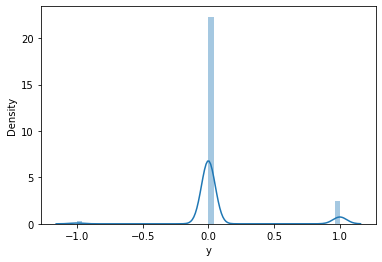

In [77]:
sb.distplot(residlog)

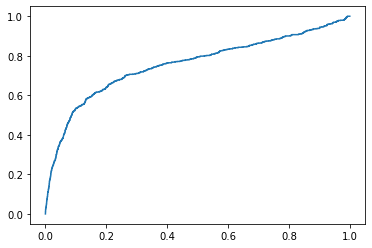

In [83]:
auc_score = roc_auc_score(y_test,lr.predict(x_test))
fpr,tpr,thresold = roc_curve(y_test,lr.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,label='log'%auc_score)

In [84]:
thresold = 0.7

In [91]:
o = np.where(roc_auc_score(y_test,lr.predict_proba(x_test)[:,1])>thresold,1,0)

# 3.B)AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
adafit = ada.fit(x_train,y_train)
adapred = adafit.predict(x_test)
adapred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
confusion_matrix(y_test,adapred)

array([[6972,   97],
       [ 694,  198]], dtype=int64)

In [34]:
adaboostaccuracy = accuracy_score(y_test,adapred)
adaboostaccuracy

0.9006406230373069

# 3.C)Random Forest / 2.C)

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfmodel = RandomForestClassifier(n_estimators=30000,random_state=2)
rffit = rfmodel.fit(x_train,y_train)
rfpred = rffit.pred(x_test)
rfpred

In [ ]:
# HYPER-PARAMETER TUNING
from sklearn.model_selection import RandomizedSearchCV
parameters = {'n_estimators':(2000,3000,6000,700,1000),'criterion':('gini','entropy'),'min_sample_split':(2,4,6),'max_features':('auto','sqrt')}

In [ ]:
modelr = RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,random_state=2)
modelr

In [ ]:
modelr.fit(x_train,y_train)

In [ ]:
modelr_best.estimator_

In [ ]:
newrfmodel = RandomForestClassifier(modelr_best.estimator_)

In [ ]:
rffit1 = newrfmodel.fit(x_train,y_train)
rfpred1 = rffit1.pred(x_test)
rfpred1

In [ ]:
rfaccu = accuracy_score(y_test,rfpred1)
rfaccu

# NAIVE BAYES

In [63]:
from sklearn.naive_bayes import GaussianNB

In [66]:
gb = GaussianNB()

In [67]:
gbfit = gb.fit(x_train,y_train)

In [70]:
gbpred = gbfit.predict(x_test)
gbpred

array([0, 1, 1, ..., 0, 0, 1])

In [71]:
confusion_matrix(y_test,gbpred)

array([[6167,  902],
       [ 456,  436]], dtype=int64)

In [74]:
nbaccuracy = accuracy_score(y_test,gbpred)
nbaccuracy

0.8294184147720136

#    3.D) KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier


In [36]:
np.sqrt(data.shape[0])

199.50689211152581

In [44]:
knn1 = KNeighborsClassifier(n_neighbors=199,p=2,metric='manhattan')
knnfit1 = knn1.fit(x_train,y_train)
knnpred1 = knnfit1.predict(x_test)
knnpred1.shape


(7961,)

In [40]:
confusion_matrix(y_test,knnpred1)

array([[6971,   98],
       [ 748,  144]], dtype=int64)

In [65]:
knnaccu = accuracy_score(y_test,knnpred1)
knnaccu

0.8937319432232131

In [ ]:
error = []
for i in range (190,250):
    knne = KNeighborsClassifier(n_neighbors=i)
    efit = knne.fit(x_train,y_train)
    epred = efit.predict(x_test)
    error.append(np.mean(epred!=y_test))

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(0,7961),error,marker='o',linestyle='-.')
plt.ylabel('error')
plt.xlabel('range of k')


In [ ]:
knnmodel = KNeighborsClassifier(n_neighbors=,p=2,metric='manhattan')
knnfit = knnmodel.fit(x_train,y_train)
knnpred = knnfit.predict(x_test)
knnpred


In [ ]:
knnaccuracy = accuracy_score(y_test,knnpred)
knnaccuracy


# 3.E) SVM

In [49]:
from sklearn.svm import SVC
svmmodel = SVC(kernel='rbf')
svmfit = svmmodel.fit(x_train,y_train)
svmfit.n_support_


array([3595, 3595])

In [50]:
svmpred = svmfit.predict(x_test)
svmpred

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
confusion_matrix(y_test,svmpred)

array([[7069,    0],
       [ 892,    0]], dtype=int64)

In [52]:
svmaccu = accuracy_score(y_test,svmpred)
svmaccu

0.8879537746514257

In [56]:
#tuninh
kernel = ['linear','rbf','poly']
for i in kernel:
    svmtunemodel = SVC(kernel=i,C=1.0)
    print('kernel',i)
    svmtunefit = svmtunemodel.fit(x_train,y_train)
    svmtunepred = svmtunefit.predict(x_test)
    svmtuneaccu = accuracy_score(y_test,svmtunepred)
    print(svmtuneaccu,'accuracy')

    

kernel linear
0.8986308252732069 accuracy
kernel rbf
0.8879537746514257 accuracy
kernel poly
0.8879537746514257 accuracy


kernel- linear accuracy is high

In [103]:
svmaccuracy = 0.8986
print('acuracy-linear',svmaccuracy)

acuracy-linear 0.8986


# 4 BEST ACCURACY MODEL

In [105]:
model = ['logistic-regression','ADABoost','Naive-Bayes','KNN','SVM']
accuracy = [logisticaccuracy,adaboostaccuracy,nbaccuracy,knnaccu,svmaccuracy]

In [106]:
mod_acc = pd.DataFrame({'model':model,'accuracy':accuracy})
mod_acc

,model,accuracy
0,logistic-regression,0.892978
1,ADABoost,0.900641
2,Naive-Bayes,0.829418
3,KNN,0.893732
4,SVM,0.898600


C:\Users\Prathiksha\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


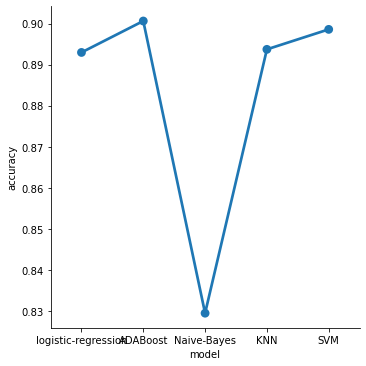

In [116]:
sb.factorplot(x='model',y='accuracy',data=mod_acc,marker='o')

THE ABOVE GRAPH SHOWS ADABOOST HAS HIGH ACCURACY OF 0.90 - adaboost is an ensembling tech which converts weak learners to strong learners and is a boosting(parallel-running) algorithm
ensemble tech is best example of bias-varaince tradeoof

WHERE THE OTHER TWO SVM AND LOGISTIC-REGRESSION IS CLOSELY ACCURATE

# PART 2 - TIME SERIES

In [154]:
timedata = pd.read_csv('MonthWiseMarketArrivals_Clean.csv')
timedata

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [155]:
#eda
timedata.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [156]:
timedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [157]:
timedata.shape

(10227, 10)

In [158]:
timedata.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [159]:
timedata.corr()

,year,quantity,priceMin,priceMax,priceMod
year,1.000000,0.018351,0.445536,0.548071,0.533262
quantity,0.018351,1.000000,-0.106708,-0.022406,-0.056827
priceMin,0.445536,-0.106708,1.000000,0.781736,0.883396
priceMax,0.548071,-0.022406,0.781736,1.000000,0.968069
priceMod,0.533262,-0.056827,0.883396,0.968069,1.000000


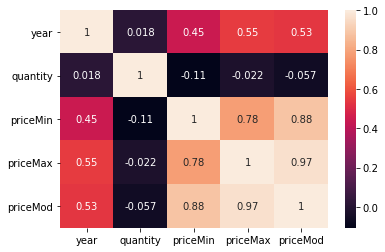

In [160]:
sb.heatmap(timedata.corr(),annot=True)

In [174]:
#drop not needed columns
tdata = timedata.drop(['month','year','city','state'],axis=1)
tdata

,market,quantity,priceMin,priceMax,priceMod,date
0,ABOHAR(PB),2350,404,493,446,January-2005
1,ABOHAR(PB),900,487,638,563,January-2006
2,ABOHAR(PB),790,1283,1592,1460,January-2010
3,ABOHAR(PB),245,3067,3750,3433,January-2011
4,ABOHAR(PB),1035,523,686,605,January-2012
...,...,...,...,...,...,...
10222,YEOLA(MS),131326,282,612,526,December-2011
10223,YEOLA(MS),207066,485,1327,1136,December-2012
10224,YEOLA(MS),215883,472,1427,1177,December-2013
10225,YEOLA(MS),201077,446,1654,1456,December-2014


In [175]:
#dataformat
tdata['date'] = pd.to_datetime(tdata['date'])
tdata

,market,quantity,priceMin,priceMax,priceMod,date
0,ABOHAR(PB),2350,404,493,446,2005-01-01
1,ABOHAR(PB),900,487,638,563,2006-01-01
2,ABOHAR(PB),790,1283,1592,1460,2010-01-01
3,ABOHAR(PB),245,3067,3750,3433,2011-01-01
4,ABOHAR(PB),1035,523,686,605,2012-01-01
...,...,...,...,...,...,...
10222,YEOLA(MS),131326,282,612,526,2011-12-01
10223,YEOLA(MS),207066,485,1327,1136,2012-12-01
10224,YEOLA(MS),215883,472,1427,1177,2013-12-01
10225,YEOLA(MS),201077,446,1654,1456,2014-12-01


In [176]:
#DATE SORT
tdata = tdata.sort_values(by='date')
tdata

,market,quantity,priceMin,priceMax,priceMod,date
5399,LASALGAON(MS),225063,160,257,226,1996-01-01
5420,LASALGAON(MS),196164,133,229,186,1996-02-01
5441,LASALGAON(MS),178992,155,274,243,1996-03-01
5461,LASALGAON(MS),192592,136,279,254,1996-04-01
5481,LASALGAON(MS),237574,154,312,269,1996-05-01
...,...,...,...,...,...,...
8226,RAIPUR(CHGARH),4300,950,1142,1077,2016-02-01
3644,INDORE(MP),97178,104,856,575,2016-02-01
10106,YEOLA(MS),272527,347,984,730,2016-02-01
8962,SATANA(MS),90142,281,1130,806,2016-02-01


q1

In [177]:
#date index
tdata = tdata.set_index('date')
tdata


,market,quantity,priceMin,priceMax,priceMod
date,,,,,
1996-01-01,LASALGAON(MS),225063,160,257,226
1996-02-01,LASALGAON(MS),196164,133,229,186
1996-03-01,LASALGAON(MS),178992,155,274,243
1996-04-01,LASALGAON(MS),192592,136,279,254
1996-05-01,LASALGAON(MS),237574,154,312,269
...,...,...,...,...,...
2016-02-01,RAIPUR(CHGARH),4300,950,1142,1077
2016-02-01,INDORE(MP),97178,104,856,575
2016-02-01,YEOLA(MS),272527,347,984,730


In [178]:
# Label Encoder
tdata['market']= LabelEncoder().fit_transform(tdata['market'])
tdata


,market,quantity,priceMin,priceMax,priceMod
date,,,,,
1996-01-01,68,225063,160,257,226
1996-02-01,68,196164,133,229,186
1996-03-01,68,178992,155,274,243
1996-04-01,68,192592,136,279,254
1996-05-01,68,237574,154,312,269
...,...,...,...,...,...
2016-02-01,96,4300,950,1142,1077
2016-02-01,49,97178,104,856,575
2016-02-01,119,272527,347,984,730


In [184]:
#train test
train =tdata.iloc[0:8181,:]
train

,market,quantity,priceMin,priceMax,priceMod
date,,,,,
1996-01-01,68,225063,160,257,226
1996-02-01,68,196164,133,229,186
1996-03-01,68,178992,155,274,243
1996-04-01,68,192592,136,279,254
1996-05-01,68,237574,154,312,269
...,...,...,...,...,...
2013-12-01,25,105750,2439,2770,2609
2013-12-01,103,64938,450,2523,1278
2013-12-01,31,298700,631,2163,1632


In [185]:
test =tdata.iloc[8181:,:]
test

,market,quantity,priceMin,priceMax,priceMod
date,,,,,
2013-12-01,7,12020,1180,1767,1463
2013-12-01,27,81900,1917,2346,2131
2013-12-01,37,23700,1631,2692,2162
2013-12-01,15,18800,2350,2533,2442
2013-12-01,99,10690,1280,2200,1620
...,...,...,...,...,...
2016-02-01,96,4300,950,1142,1077
2016-02-01,49,97178,104,856,575
2016-02-01,119,272527,347,984,730


Text(0, 0.5, 'moderate price')

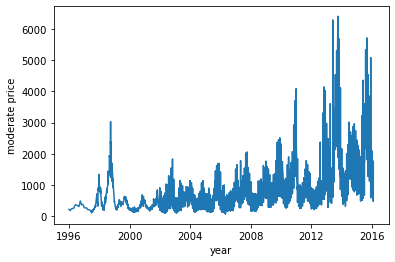

In [189]:
# visualize
plt.plot(tdata['priceMod'])
plt.xlabel('year')
plt.ylabel('moderate price')

In [190]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

<ipython-input-193-5793fcd06d06>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = sd(tdata['priceMod'],model='multiplicative',freq=60)


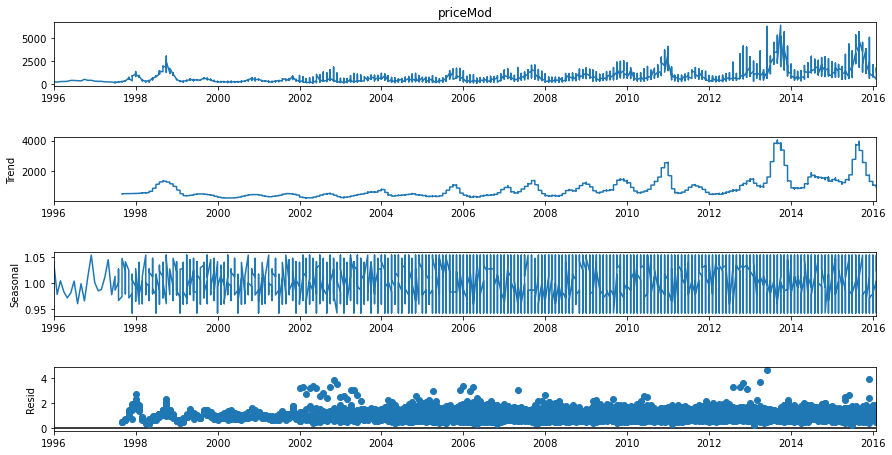

In [193]:
result = sd(tdata['priceMod'],model='multiplicative',freq=60)
fig= result.plot()
fig.set_size_inches(14,7)

arima-integrate

In [197]:
from statsmodels.tsa.stattools import adfuller as af,kpss as kp

DICKEY-FULLER TEST

In [195]:
aftest = af(tdata['priceMod'],autolag = 'AIC')
aftest

(-3.2642177567854915,
 0.01655569863984099,
 32,
 10194,
 {'1%': -3.430991646794122,
  '5%': -2.8618235703087764,
  '10%': -2.566920939332377},
 147075.82985733185)

In [196]:
pd.DataFrame({'values':aftest[0:4]},index=('teststat','p-val','lag','no-obs'))

,values
teststat,-3.264218
p-val,0.016556
lag,32.000000
no-obs,10194.000000


KPSS TEST

In [201]:
kps = kp(tdata['priceMod'],regression='c',nlags='legacy')
pd.DataFrame({'values':kps[0:3]},index=('teststat','p-val','lag'))

C:\Users\Prathiksha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


,values
teststat,10.303532
p-val,0.010000
lag,39.000000


## question2 

so data is stationary

In [203]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

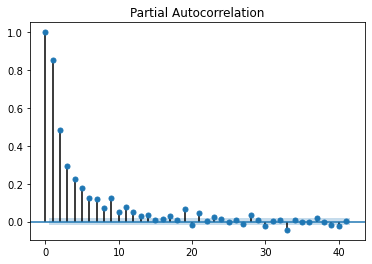

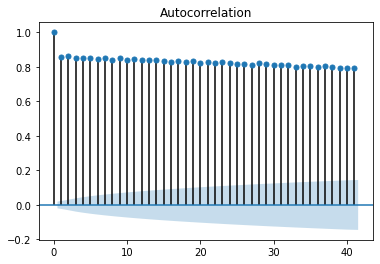

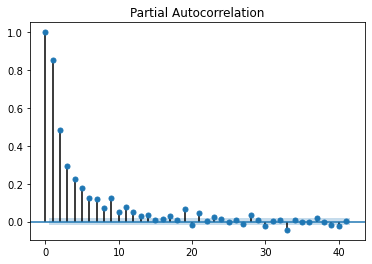

In [205]:
plot_acf(tdata['priceMod']) #
plot_pacf(tdata['priceMod']) #

In [206]:
from statsmodels.tsa.arima_model import ARIMA

In [231]:
modelar = ARIMA(tdata.priceMod,order=(0,0,0))
arfit = modelar.fit()
arfit.aic

C:\Users\Prathiksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Prathiksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


153620.51165273474

In [ ]:
arpred = arfit.forecast(steps=2046)[0]
arpred

In [ ]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
squared_error = mse(test,arpred)
squared_error

In [ ]:
root_square_error = mse(test,arpred,squared= False)
root_square_error